In [35]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
path = "plaid_csvs/vqvae_fsq.csv"
df = pd.read_csv(path, sep=",")

In [38]:
vq_df = df[df.Name == "cath-vqvae"]
fsq_df = df[df.Name == "cath-fsq"]

In [39]:
vq_df['cfg.hourglass.n_e'] = vq_df['cfg.hourglass.n_e'].astype(int)
vq_df

/tmp/ipykernel_34698/3913722763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vq_df['cfg.hourglass.n_e'] = vq_df['cfg.hourglass.n_e'].astype(int)


,Name,cfg.hourglass.n_e,cfg.hourglass.fsq_levels,ID,Runtime,Commit,GitHub,End Time,Hostname,Notes,...,train/vq_loss,train/vq_perplexity,val/vq_loss,val/vq_perplexity,cfg.hourglass.downproj_factor,cfg.hourglass.shorten_factor,Created,structure_reconstruction/vq_loss,structure_reconstruction/vq_perplexity,cfg.datamodule.batch_size
7,cath-vqvae,64,NaN,sbrib6ob,42914,70778171561478e18d5733d182388820f034d920,https://github.com/amyxlu/plaid-dev-distribute...,2024-05-21T10:27:44.000Z,gpu2-st-a100x8-1-17,-,...,0.003813,5.486956,0.003837,5.760293,1,1,2024-05-20T22:32:30.000Z,0.012630,44.002144,64
8,cath-vqvae,4096,NaN,qmbg5t8m,42914,70778171561478e18d5733d182388820f034d920,https://github.com/amyxlu/plaid-dev-distribute...,2024-05-21T10:27:44.000Z,gpu2-st-a100x8-1-17,-,...,0.005823,12.237287,0.005455,7.426789,1,1,2024-05-20T22:32:30.000Z,0.019015,81.537415,64
9,cath-vqvae,1024,NaN,a1z93f0w,43233,70778171561478e18d5733d182388820f034d920,https://github.com/amyxlu/plaid-dev-distribute...,2024-05-21T10:33:03.000Z,gpu2-st-a100x8-1-1,-,...,0.004430,7.810396,0.004697,8.001155,4,1,2024-05-20T22:32:30.000Z,0.013539,97.947548,128
10,cath-vqvae,256,NaN,4p7efzza,42860,70778171561478e18d5733d182388820f034d920,https://github.com/amyxlu/plaid-dev-distribute...,2024-05-21T10:26:50.000Z,gpu2-st-a100x8-1-1,-,...,0.004055,6.354888,0.004064,7.149798,4,1,2024-05-20T22:32:30.000Z,0.011721,81.716156,128
11,cath-vqvae,16384,NaN,pjr3qhkp,42948,70778171561478e18d5733d182388820f034d920,https://github.com/amyxlu/plaid-dev-distribute...,2024-05-21T10:26:58.000Z,gpu2-st-a100x8-1-8,-,...,0.013473,50.216381,0.012511,20.239336,4,1,2024-05-20T22:31:10.000Z,0.032638,54.336506,128
12,cath-vqvae,65536,NaN,g69njjq4,42950,70778171561478e18d5733d182388820f034d920,https://github.com/amyxlu/plaid-dev-distribute...,2024-05-21T10:27:00.000Z,gpu2-st-a100x8-1-8,-,...,0.012032,62.277126,0.012736,22.529156,4,1,2024-05-20T22:31:10.000Z,0.044255,33.719593,64
13,cath-vqvae,16,NaN,5lha1r65,42945,70778171561478e18d5733d182388820f034d920,https://github.com/amyxlu/plaid-dev-distribute...,2024-05-21T10:26:55.000Z,gpu2-st-a100x8-1-3,-,...,0.000737,1.244260,0.000941,1.260155,4,1,2024-05-20T22:31:10.000Z,0.002884,2.045713,128


In [40]:
def mapping_fn(s):
    mapping = {
        "[4,4]": 2 ** 4,
        "[4,4,4]": 2 ** 6,
        "[8,6,5]": 2 ** 8,
        "[8,5,5,5]": 2 ** 10,
        "[7,5,5,5,5]": 2 ** 12,
        "[8,8,8,6,5]": 2 ** 14,
        "[8,8,8,5,5,5]": 2 ** 16
    }
    try:
        return mapping[s]
    except KeyError:
        return np.nan

fsq_df['codebook'] = fsq_df['cfg.hourglass.fsq_levels'].map(lambda x: mapping_fn(x))
fsq_df

/tmp/ipykernel_34698/514111804.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fsq_df['codebook'] = fsq_df['cfg.hourglass.fsq_levels'].map(lambda x: mapping_fn(x))


,Name,cfg.hourglass.n_e,cfg.hourglass.fsq_levels,ID,Runtime,Commit,GitHub,End Time,Hostname,Notes,...,train/vq_perplexity,val/vq_loss,val/vq_perplexity,cfg.hourglass.downproj_factor,cfg.hourglass.shorten_factor,Created,structure_reconstruction/vq_loss,structure_reconstruction/vq_perplexity,cfg.datamodule.batch_size,codebook
0,cath-fsq,NaN,"[7,5,5,5,5]",5v3np72i,42926,70778171561478e18d5733d182388820f034d920,https://github.com/amyxlu/plaid-dev-distribute...,2024-05-21T10:33:06.000Z,gpu2-st-a100x8-1-14,-,...,NaN,NaN,NaN,4,1,2024-05-20T22:37:40.000Z,NaN,NaN,128,4096
1,cath-fsq,NaN,"[4,4,4]",w8qlmbfk,42593,70778171561478e18d5733d182388820f034d920,https://github.com/amyxlu/plaid-dev-distribute...,2024-05-21T10:27:32.000Z,gpu2-st-a100x8-1-13,-,...,NaN,NaN,NaN,1,1,2024-05-20T22:37:39.000Z,NaN,NaN,64,64
2,cath-fsq,NaN,"[8,6,5]",onvtfdg2,42593,70778171561478e18d5733d182388820f034d920,https://github.com/amyxlu/plaid-dev-distribute...,2024-05-21T10:27:32.000Z,gpu2-st-a100x8-1-13,-,...,NaN,NaN,NaN,1,1,2024-05-20T22:37:39.000Z,NaN,NaN,64,256
3,cath-fsq,NaN,"[4,4]",mu72a8vd,42595,70778171561478e18d5733d182388820f034d920,https://github.com/amyxlu/plaid-dev-distribute...,2024-05-21T10:27:34.000Z,gpu2-st-a100x8-1-13,-,...,NaN,NaN,NaN,4,1,2024-05-20T22:37:39.000Z,NaN,NaN,128,16
4,cath-fsq,NaN,"[8,8,8,5,5,5]",7dga88v8,42932,70778171561478e18d5733d182388820f034d920,https://github.com/amyxlu/plaid-dev-distribute...,2024-05-21T10:33:03.000Z,gpu2-st-a100x8-1-17,-,...,NaN,NaN,NaN,4,1,2024-05-20T22:37:31.000Z,NaN,NaN,128,65536
5,cath-fsq,NaN,"[8,8,8,6,5]",4e0ct6zj,42613,70778171561478e18d5733d182388820f034d920,https://github.com/amyxlu/plaid-dev-distribute...,2024-05-21T10:27:44.000Z,gpu2-st-a100x8-1-17,-,...,NaN,NaN,NaN,1,1,2024-05-20T22:37:31.000Z,NaN,NaN,64,16384
6,cath-fsq,NaN,"[8,5,5,5]",yvberwqn,42626,70778171561478e18d5733d182388820f034d920,https://github.com/amyxlu/plaid-dev-distribute...,2024-05-21T10:27:44.000Z,gpu2-st-a100x8-1-17,-,...,NaN,NaN,NaN,1,1,2024-05-20T22:37:18.000Z,NaN,NaN,64,1024


In [44]:
fsq_df = fsq_df.sort_values(by="codebook")
vq_df = vq_df.rename({"cfg.hourglass.n_e": "codebook"}, axis=1)
vq_df = vq_df.sort_values(by="codebook")

In [45]:
vq_df.columns

Index(['Name', 'codebook', 'cfg.hourglass.fsq_levels', 'ID', 'Runtime',
       'Commit', 'GitHub', 'End Time', 'Hostname', 'Notes', 'State', 'Updated',
       'Tags', 'cfg.callbacks.checkpoint.auto_insert_metric_name',
       'cfg.callbacks.checkpoint.mode', 'cfg.callbacks.checkpoint.monitor',
       'cfg.logger.name', 'downproj_factor', 'latent_scaler',
       'cfg.hourglass.enforce_single_codebook_per_position',
       'enforce_single_codebook_per_position', 'epoch', 'lr-AdamW',
       'structure_reconstruction/lddt_mean',
       'structure_reconstruction/lddt_median', 'structure_reconstruction/loss',
       'structure_reconstruction/recons_loss',
       'structure_reconstruction/rmsd_mean',
       'structure_reconstruction/rmsd_median',
       'structure_reconstruction/rmspd_mean',
       'structure_reconstruction/rmspd_median',
       'structure_reconstruction/tmscore_mean',
       'structure_reconstruction/tmscore_median', 'train/loss',
       'train/recons_loss', 'train/seq_acc_e

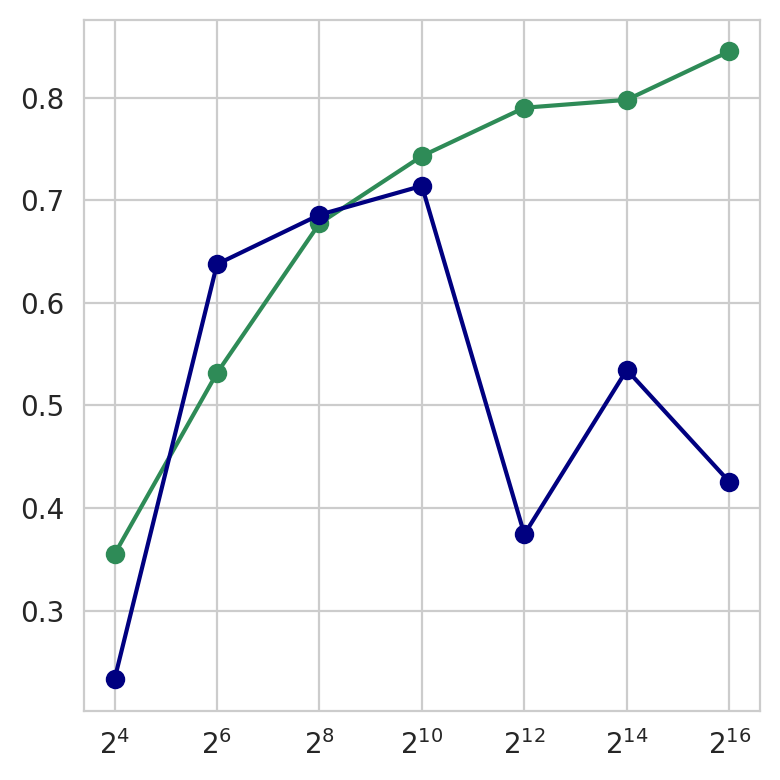

In [140]:
plt.rcParams['text.usetex'] = False
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (4,4)
plt.rcParams['font.family'] = 'serif'

sns.set_style("whitegrid")
fig,ax = plt.subplots()
ax.set_xscale("log",base=2)

from matplotlib.ticker import FuncFormatter


ax.plot(fsq_df['codebook'].values, fsq_df['structure_reconstruction/tmscore_mean'].values, label="FSQ", marker="o", color='seagreen')
ax.plot(vq_df['codebook'].values, vq_df['structure_reconstruction/tmscore_mean'].values, label="VQ-VAE", marker="o", color='navy')
ax.set_xticks(np.power(2, np.arange(4, 17, 2)))
plt.tight_layout()
plt.show()

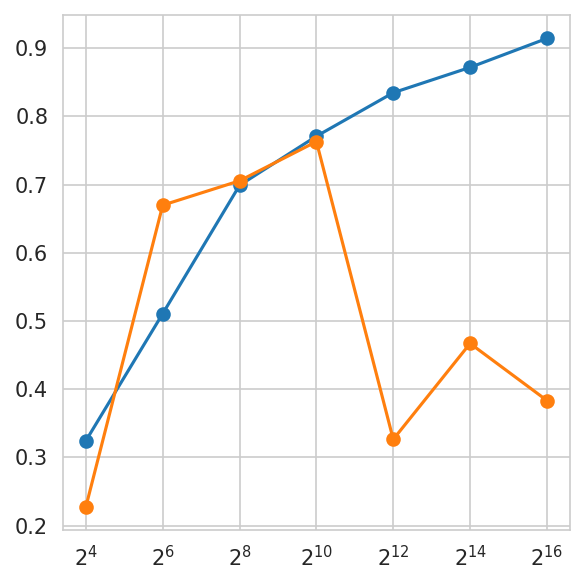

In [143]:
plt.rcParams['text.usetex'] = False
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (4,4)
plt.rcParams['font.family'] = 'serif'

sns.set_style("whitegrid")
fig,ax = plt.subplots()
ax.set_xscale("log",base=2)

from matplotlib.ticker import FuncFormatter


ax.plot(fsq_df['codebook'].values, fsq_df['structure_reconstruction/tmscore_median'].values, label="FSQ", marker="o")
ax.plot(vq_df['codebook'].values, vq_df['structure_reconstruction/tmscore_median'].values, label="VQ-VAE", marker="o")
ax.set_xticks(np.power(2, np.arange(4, 17, 2)))
plt.tight_layout()
plt.show()

In [73]:
fsq

3    mu72a8vd
1    w8qlmbfk
2    onvtfdg2
6    yvberwqn
0    5v3np72i
5    4e0ct6zj
4    7dga88v8
Name: ID, dtype: object

In [53]:
import wandb
import json

api = wandb.Api()
run = api.run(f"lu-amy-al1/plaid-hourglass-2/{fsq_df.ID[0]}")

In [129]:
def run_id_to_stats(run_id, category="structure_reconstruction",metric="tmscore"):
    api = wandb.Api()
    run = api.run(f"lu-amy-al1/plaid-hourglass-2/{run_id}")
    x = run.summary[f'{category}/{metric}_hist']['bins']
    y = run.summary[f'{category}/{metric}_hist']['values']
    x = np.array(x)
    midpoints = (x[1:] + x[:-1]) / 2
    
    mean = np.average(midpoints, weights=y)
    variance = np.average((midpoints - mean) ** 2, weights=y)
    std = np.sqrt(variance)
    return mean, variance, std

In [133]:
def scrape_multi_run_values(df, metric="tmscore", category="structure_reconstruction"):
    # get FSQ metrics
    means = []
    stds = []
    
    for id_ in df.ID:
        mean, _, std = run_id_to_stats(id_, category, metric=metric)
        means.append(mean)
        stds.append(std)
    
    means = np.array(means)
    stds = np.array(stds)
    return means, stds


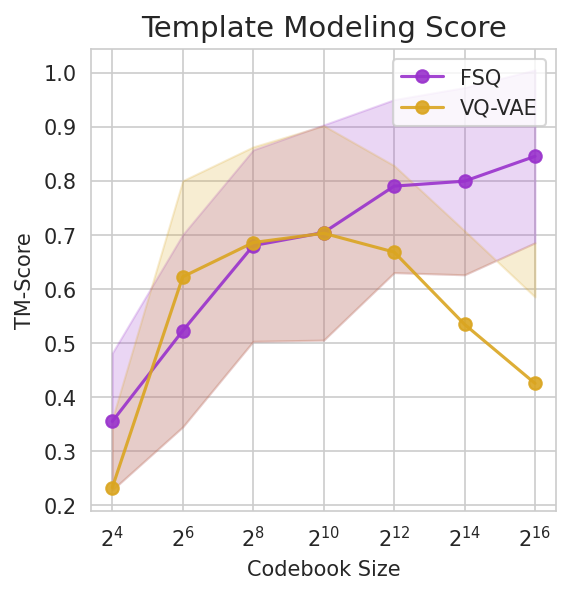

In [165]:
metric = "tmscore"

plt.rcParams['text.usetex'] = False
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (4,4)
plt.rcParams['font.family'] = 'serif'


sns.set_style("whitegrid")
fig, ax = plt.subplots()

fsq_means, fsq_stds = scrape_multi_run_values(fsq_df, metric)
vq_means, vq_stds = scrape_multi_run_values(vq_df, metric)

ax.set_xscale("log",base=2)
ax.set_xticks(np.power(2, np.arange(4, 17, 2)))

codebook = fsq_df.codebook

# FSQ plot
ax.plot(codebook, fsq_means ,marker="o",color='darkorchid', alpha=0.9, label="FSQ")
ax.fill_between(codebook, fsq_means + fsq_stds, fsq_means - fsq_stds, alpha=0.2,color='darkorchid')

# VQ plot
ax.plot(codebook, vq_means ,marker="o",color='goldenrod', alpha=0.9, label="VQ-VAE")
ax.fill_between(codebook, vq_means + fsq_stds, fsq_means - fsq_stds, alpha=0.2,color='goldenrod')

ax.set_title('Template Modeling Score',fontsize=14)
ax.set_ylabel("TM-Score", fontsize=10)
ax.set_xlabel('Codebook Size', fontsize=10)
plt.legend()

plt.show()

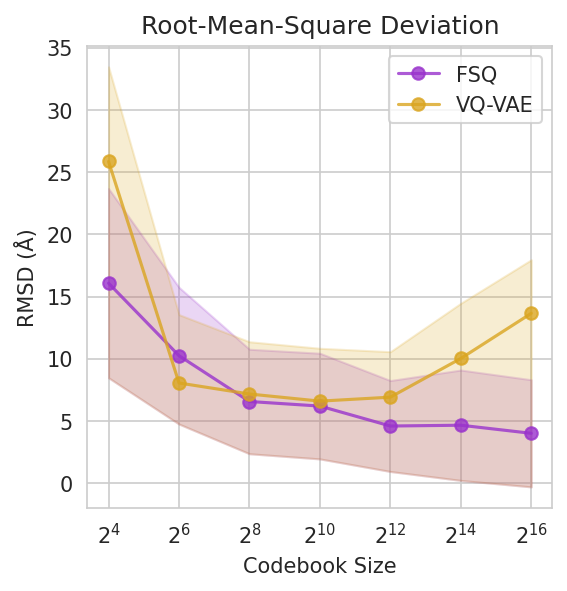

In [157]:
metric = "rmsd"



sns.set_style("whitegrid")
fig, ax = plt.subplots()

fsq_means, fsq_stds = scrape_multi_run_values(fsq_df, metric)
vq_means, vq_stds = scrape_multi_run_values(vq_df, metric)

ax.set_xscale("log",base=2)
ax.set_xticks(np.power(2, np.arange(4, 17, 2)))

codebook = fsq_df.codebook

# FSQ plot
ax.plot(codebook, fsq_means ,marker="o",color='darkorchid',label="FSQ", alpha=0.8)
ax.fill_between(codebook, fsq_means + fsq_stds, fsq_means - fsq_stds, alpha=0.2,color='darkorchid')

# VQ plot
ax.plot(codebook, vq_means ,marker="o",color='goldenrod',label="VQ-VAE", alpha=0.8)
ax.fill_between(codebook, vq_means + fsq_stds, fsq_means - fsq_stds, alpha=0.2,color='goldenrod')

ax.set_title("Root-Mean-Square Deviation")
ax.set_ylabel("RMSD (Å)")
ax.set_xlabel("Codebook Size")
plt.legend()
plt.show()

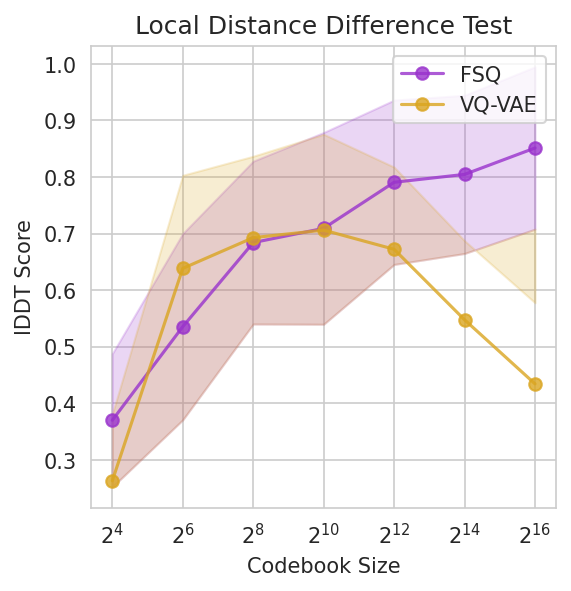

In [160]:
metric = "lddt"


sns.set_style("whitegrid")
fig, ax = plt.subplots()

fsq_means, fsq_stds = scrape_multi_run_values(fsq_df, metric)
vq_means, vq_stds = scrape_multi_run_values(vq_df, metric)

ax.set_xscale("log",base=2)
ax.set_xticks(np.power(2, np.arange(4, 17, 2)))

codebook = fsq_df.codebook

# FSQ plot
ax.plot(codebook, fsq_means ,marker="o",color='darkorchid',label="FSQ", alpha=0.8)
ax.fill_between(codebook, fsq_means + fsq_stds, fsq_means - fsq_stds, alpha=0.2,color='darkorchid')

# VQ plot
ax.plot(codebook, vq_means ,marker="o",color='goldenrod',label="VQ-VAE", alpha=0.8)
ax.fill_between(codebook, vq_means + fsq_stds, fsq_means - fsq_stds, alpha=0.2,color='goldenrod')

ax.set_title("Local Distance Difference Test")
ax.set_ylabel("lDDT Score")
ax.set_xlabel("Codebook Size")
plt.legend()
plt.show()

# no error bar metrics

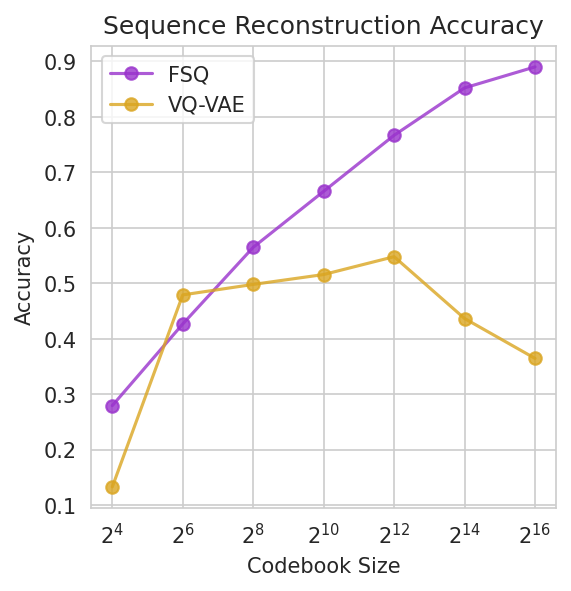

In [159]:
metric = "seq_acc"
category = "val"

# 'val/recons_loss', 'val/seq_acc', 'val/seq_loss',
#        'train/vq_loss', 'train/vq_perplexity', 'val/vq_loss',
#        'val/vq_perplexity', 'cfg.hourglass.downproj_factor',
#        'cfg.hourglass.shorten_factor', 'Created',

sns.set_style("whitegrid")
fig, ax = plt.subplots()

ax.set_xscale("log",base=2)
ax.set_xticks(np.power(2, np.arange(4, 17, 2)))
codebook = fsq_df.codebook

fsq_y = fsq_df[f"{category}/{metric}"].values
vq_y = vq_df[f"{category}/{metric}"].values

# FSQ plot
ax.plot(codebook, fsq_y ,marker="o",color='darkorchid',label="FSQ", alpha=0.8)
# VQ plot
ax.plot(codebook, vq_y ,marker="o",color='goldenrod',label="VQ-VAE", alpha=0.8)

ax.set_title("Sequence Reconstruction Accuracy")
ax.set_ylabel("Accuracy")
ax.set_xlabel("Codebook Size")
plt.legend()
plt.show()

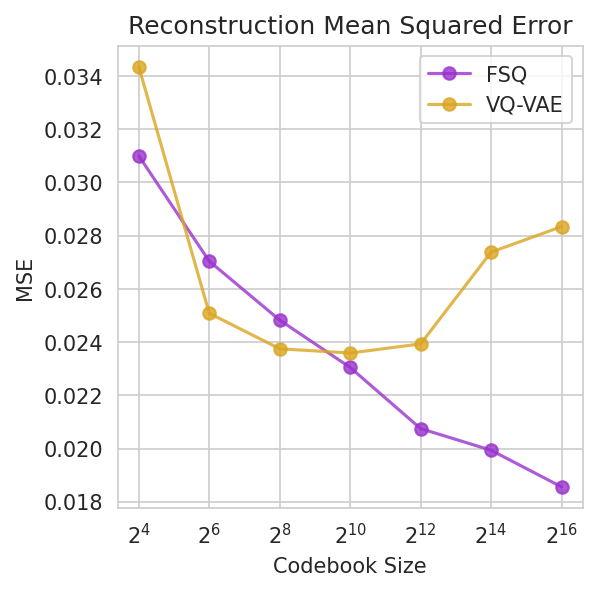

In [166]:
metric = "recons_loss"
category = "val"

# 'val/recons_loss', 'val/seq_acc', 'val/seq_loss',
#        'train/vq_loss', 'train/vq_perplexity', 'val/vq_loss',
#        'val/vq_perplexity', 'cfg.hourglass.downproj_factor',
#        'cfg.hourglass.shorten_factor', 'Created',

sns.set_style("whitegrid")
fig, ax = plt.subplots()

ax.set_xscale("log",base=2)
ax.set_xticks(np.power(2, np.arange(4, 17, 2)))
codebook = fsq_df.codebook

fsq_y = fsq_df[f"{category}/{metric}"].values
vq_y = vq_df[f"{category}/{metric}"].values

# FSQ plot
ax.plot(codebook, fsq_y ,marker="o",color='darkorchid',label="FSQ", alpha=0.8)
# VQ plot
ax.plot(codebook, vq_y ,marker="o",color='goldenrod',label="VQ-VAE", alpha=0.8)

ax.set_title("Reconstruction Mean Squared Error")
ax.set_ylabel("MSE")
ax.set_xlabel("Codebook Size")
plt.legend()
plt.show()

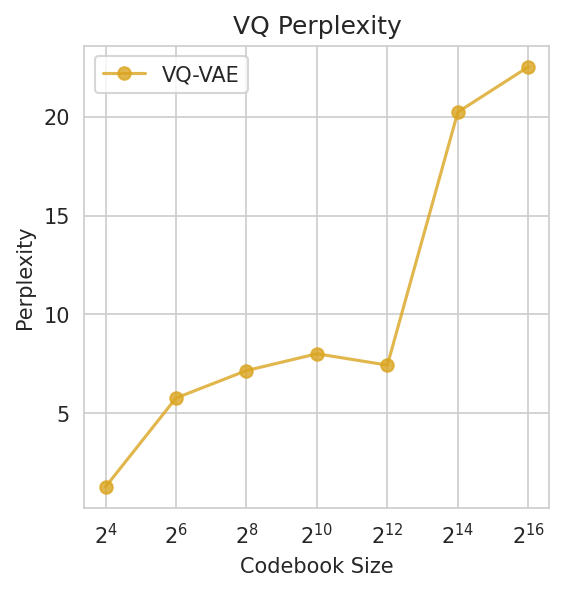

In [172]:
sns.set_style("whitegrid")
fig, ax = plt.subplots()

ax.set_xscale("log",base=2)
ax.set_xticks(np.power(2, np.arange(4, 17, 2)))

ax.plot(codebook, vq_df['val/vq_perplexity'], marker="o",color='goldenrod',label="VQ-VAE", alpha=0.8)

ax.set_title("VQ Perplexity")
ax.set_ylabel("Perplexity")
ax.set_xlabel("Codebook Size")
plt.legend()

In [175]:
run_id = "mu72a8vd"
api = wandb.Api()
run = api.run(f"lu-amy-al1/plaid-hourglass-2/{run_id}")
# x = run.summary[f'{category}/{metric}_hist']['bins']
# y = run.summary[f'{category}/{metric}_hist']['values']
# x = np.array(x)
# midpoints = (x[1:] + x[:-1]) / 2

# mean = np.average(midpoints, weights=y)
# variance = np.average((midpoints - mean) ** 2, weights=y)
# std = np.sqrt(variance)

In [230]:
def get_codebook_utilization(run_id, mode='fsq'):
    api = wandb.Api()
    run = api.run(f"lu-amy-al1/plaid-hourglass-2/{run_id}")
    metric = "compressed_rep"
    category = "structure_reconstruction"
    x = run.summary[f'{category}/{metric}_hist']['bins']
    y = run.summary[f'{category}/{metric}_hist']['values']
    x = np.array(x)
    midpoints = (x[1:] + x[:-1]) / 2
    
    fig, ax = plt.subplots(figsize=(3,3), dpi=200)
    if mode == 'fsq':
        ax = sns.barplot(x=midpoints, y=y, color='darkorchid',alpha=0.8)
        ax.set_title(f"FSQ levels: {run.config['fsq_levels']}")
    elif mode == "vq":
        ax = sns.barplot(x=midpoints, y=y, color='goldenrod',alpha=0.8)
        ax.set_title(f"VQ codebook size: {run.config['n_e']}")
    ax.set_xticks([])
    plt.show()

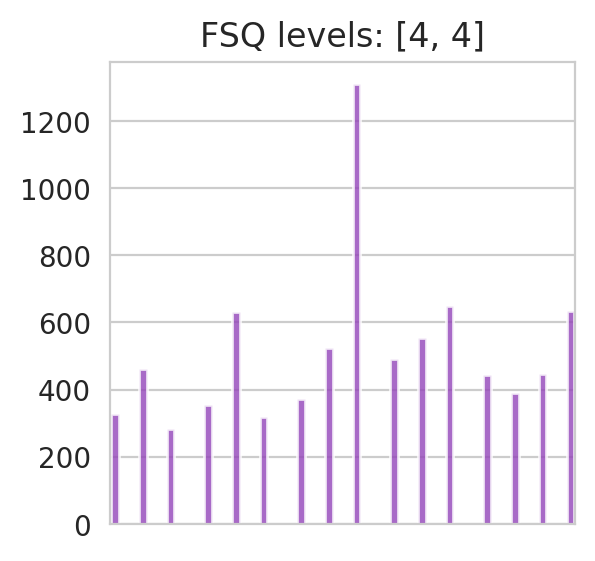

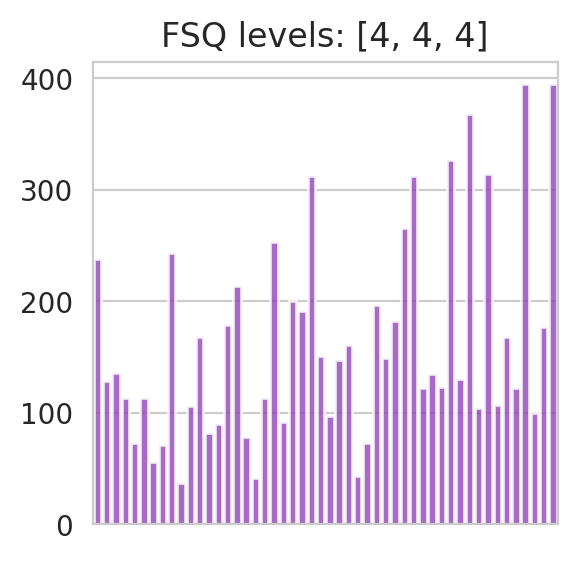

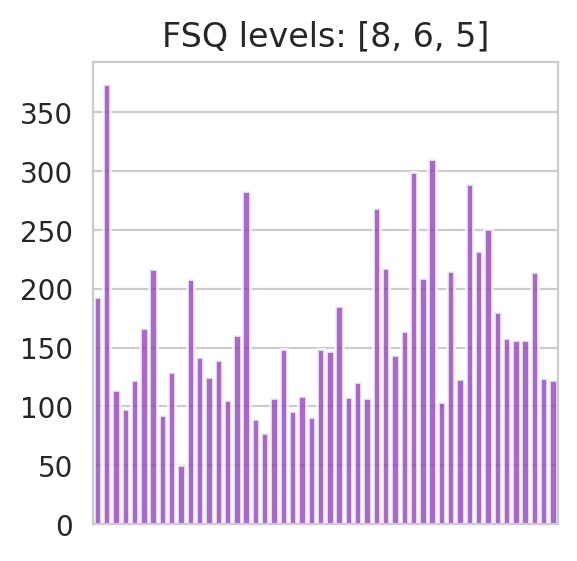

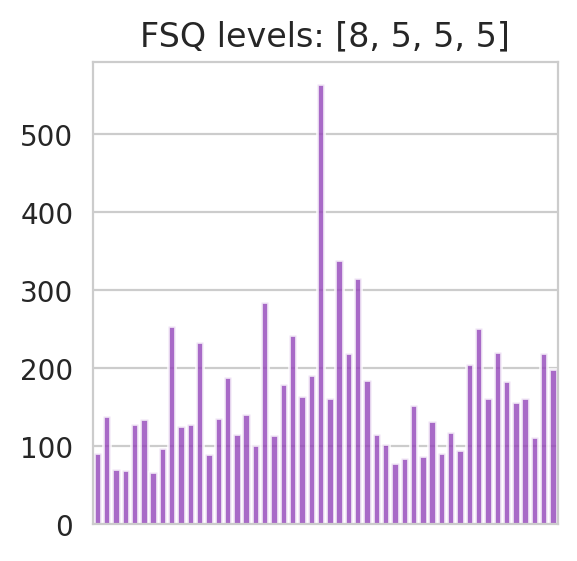

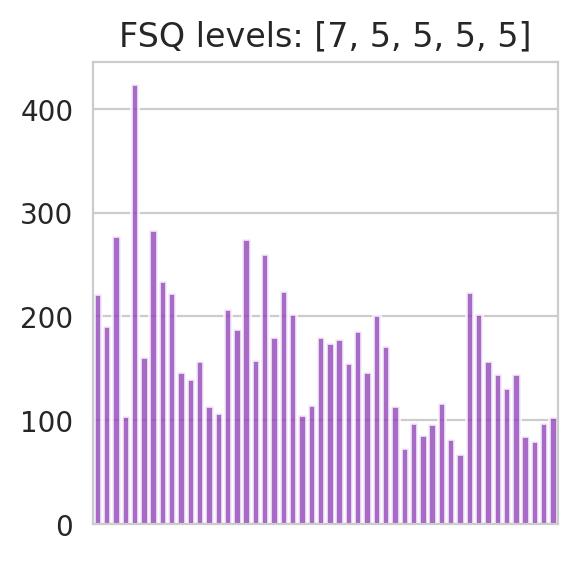

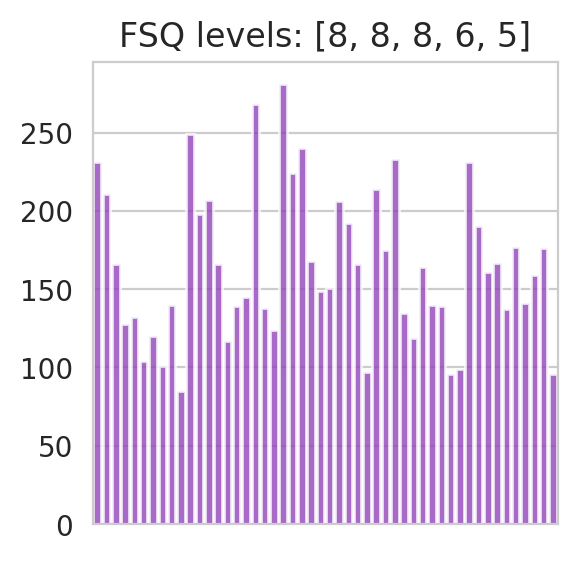

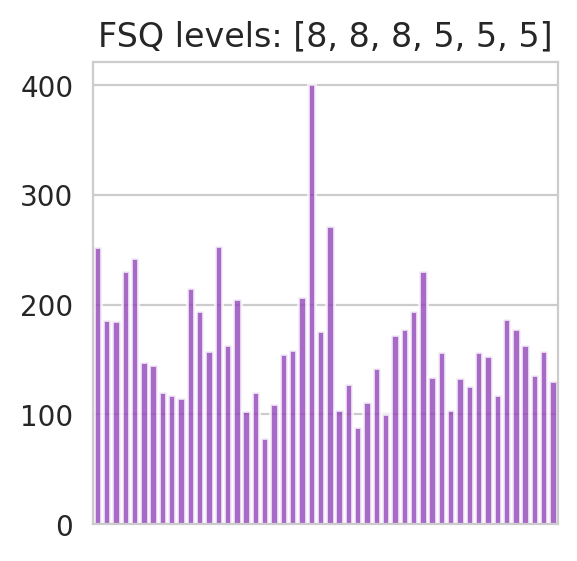

In [231]:
for run_id in fsq_df.ID.values:
    get_codebook_utilization(run_id,mode='fsq')

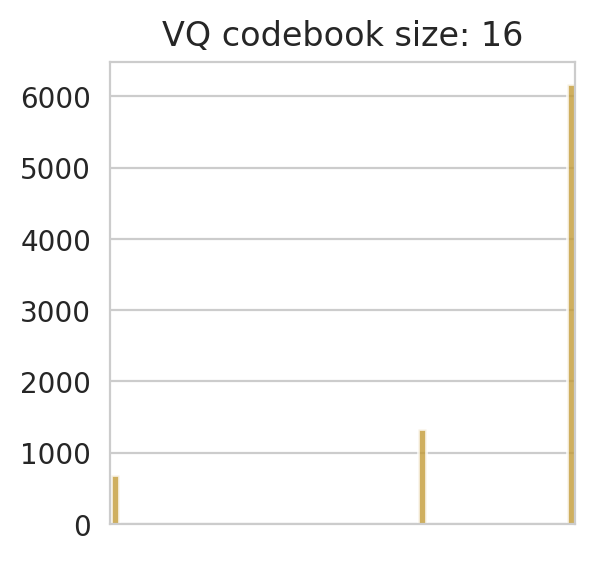

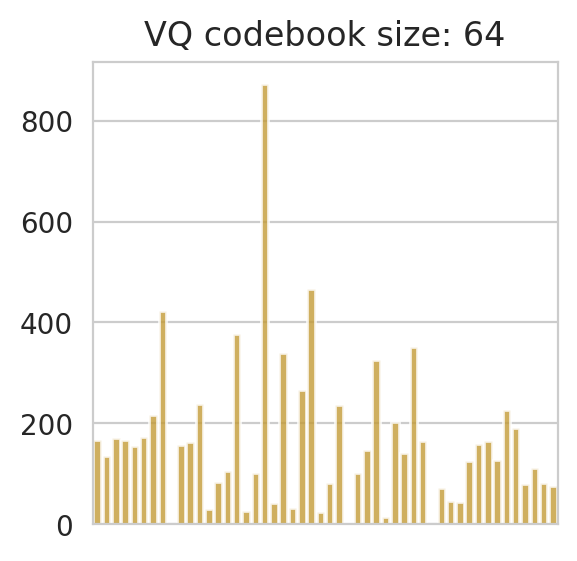

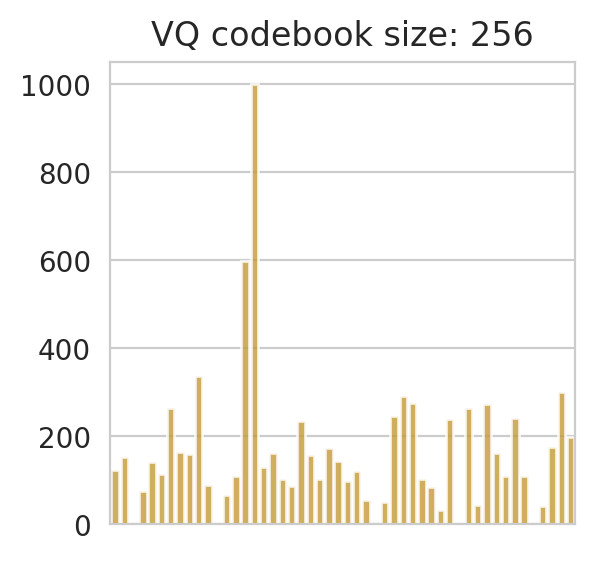

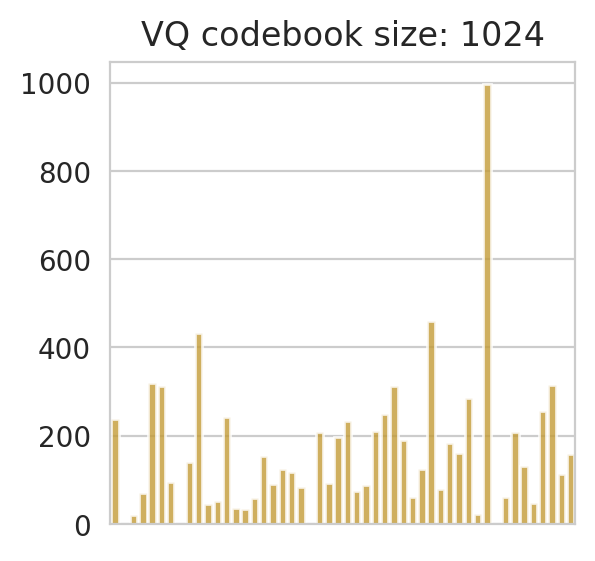

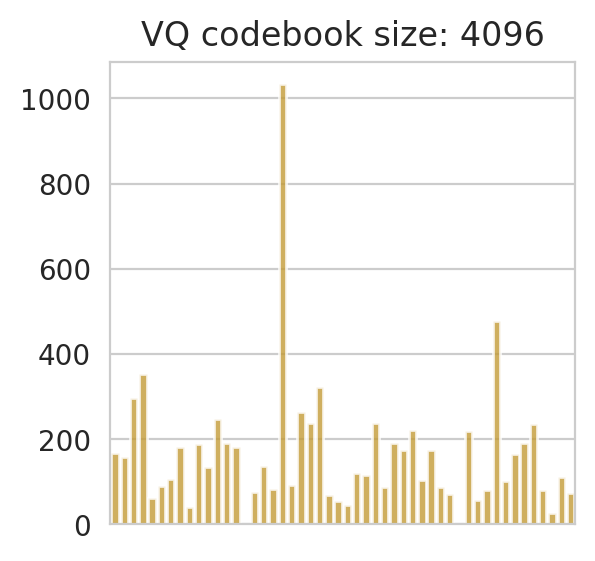

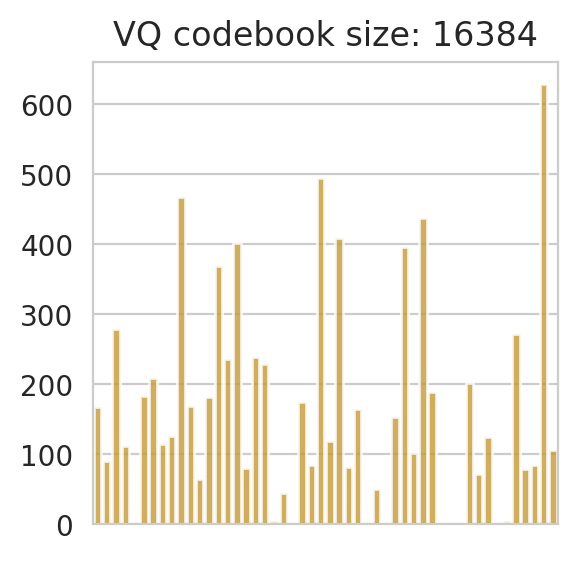

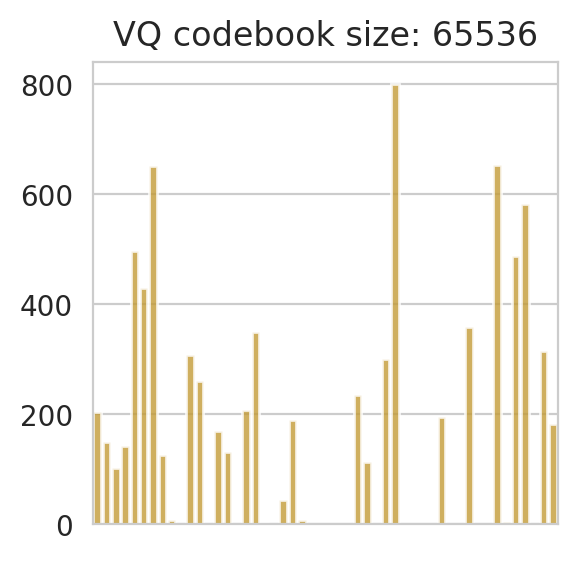

In [232]:
for run_id in vq_df.ID.values:
    get_codebook_utilization(run_id,mode='vq')